In [1]:
%matplotlib inline
from collections import defaultdict
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display
from IPython.core.display import HTML
entries = pd.read_csv('survey_results_public.csv', header=0, sep=',')

In [2]:
entries.head(10)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Student,"Yes, both",New Zealand,"Yes, full-time","Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Disagree,NaN,A bachelor's degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
6,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,...,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
7,8,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,...,Somewhat agree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN
8,9,Professional developer,"Yes, I program as a hobby",Colombia,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","5,000 to 9,999 employees",...,Strongly disagree,Male,A bachelor's degree,Hispanic or Latino/Latina,Somewhat agree,Strongly agree,Disagree,Strongly agree,NaN,NaN
9,10,Professional developer,"Yes, I program as a hobby",France,"Yes, full-time","Independent contractor, freelancer, or self-em...",Master's degree,Computer science or software engineering,It's complicated,NaN,...,Disagree,Male,A doctoral degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,NaN,NaN


In [3]:
students = entries.groupby(['Professional']).get_group('Student')

In [4]:
frameworkList = [str(frames).replace(" ", "").split(";") for frames in students['WantWorkFramework']]
frameworks = [frame for sublist in frameworkList for frame in sublist]

while 'nan' in frameworks: 
    frameworks.remove('nan')
frameworks = pd.Series(frameworks)

In [5]:
frameworks.value_counts()

Node.js      1480
AngularJS    1086
React         801
.NETCore      745
Firebase      505
Xamarin       415
Hadoop        370
Cordova       251
Spark         228
dtype: int64

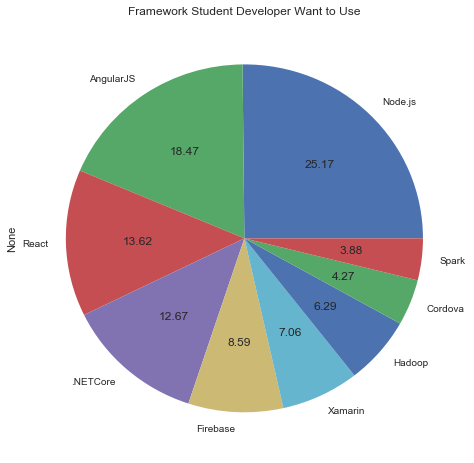

In [16]:
frameworks.value_counts()[0:9].plot(kind='pie',title='Framework Student Developer Want to Use', figsize=(8,8), autopct='%.2f')

In [7]:
s = frameworks.value_counts()[0:9]

In [8]:
s

Node.js      1480
AngularJS    1086
React         801
.NETCore      745
Firebase      505
Xamarin       415
Hadoop        370
Cordova       251
Spark         228
dtype: int64

In [9]:
sindex = list(s.index)

In [10]:
lindex = []
for i in range(9):
    lindex.append(s[sindex[i]])

In [11]:
lindex

[1480, 1086, 801, 745, 505, 415, 370, 251, 228]

In [12]:
s[sindex[0]]

1480

In [13]:
df = pd.DataFrame({'Framework' : sindex, 'Number': lindex })

In [14]:
df

,Framework,Number
0,Node.js,1480
1,AngularJS,1086
2,React,801
3,.NETCore,745
4,Firebase,505
5,Xamarin,415
6,Hadoop,370
7,Cordova,251
8,Spark,228


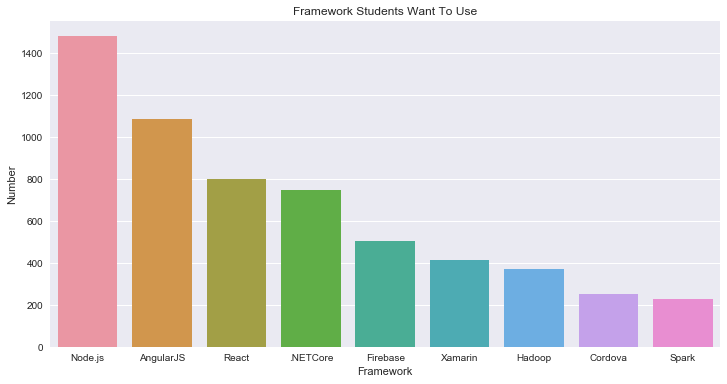

In [17]:
sns.set()
fig= plt.figure(figsize=(12,6))
plt.title('Framework Students Want To Use')
sns.barplot(data=df, x ='Framework', y ='Number')

In [18]:
professionals = entries.groupby(['Professional']).get_group('Professional developer')

In [19]:
proLanguageList = [str(langs).replace(" ", "").split(";") for langs in professionals['WantWorkFramework']]
proLanguages = [lang for sublist in proLanguageList for lang in sublist]
while 'nan' in proLanguages: 
    proLanguages.remove('nan')
proLanguages = pd.Series(proLanguages)

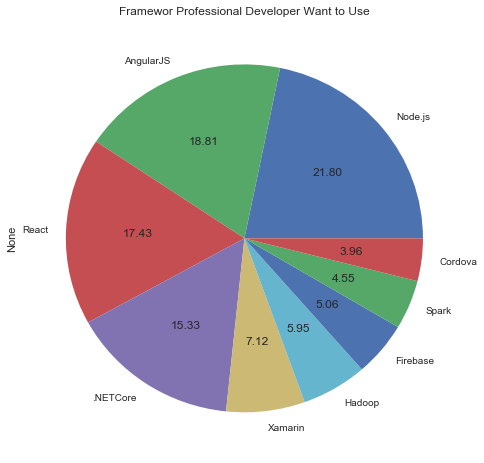

In [21]:
proLanguages.value_counts()[0:9].plot(kind='pie',title='Framewor Professional Developer Want to Use', figsize=(8,8), autopct='%.2f')

In [82]:
p = proLanguages.value_counts()[0:10]

In [83]:
pindex = list(p.index)

In [84]:
pvalue = []
for i in range(len(pindex)):
    pvalue.append(p[i])

In [85]:
dfp = pd.DataFrame({'Language' : pindex, 'Number': pvalue })

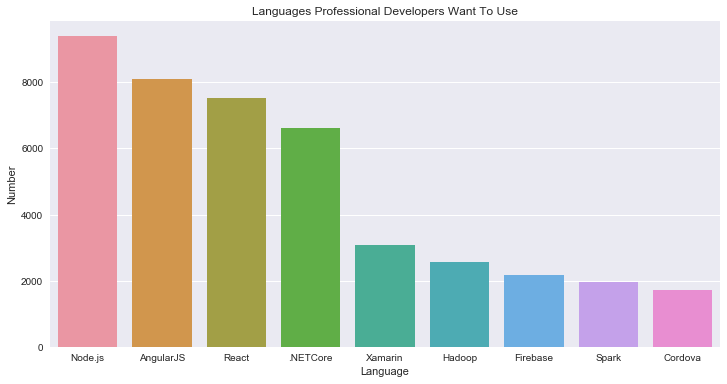

In [89]:
fig= plt.figure(figsize=(12,6))
plt.title('Languages Professional Developers Want To Use')
sns.barplot(data=dfp, x ='Language', y ='Number')